In [1]:
import pandas as pd
import statsmodels.api as sm

from utils.regression import plot, apa_latex_est_tablular, REGRESSORS, COUNTRIES_ISO

In [2]:
df = pd.read_csv("./data/wvs/wave7.csv")
# since the preprocessing does not incoporate wfpi normalization i'm gonna include it here
df["wpfi"] = df.wpfi_rank / 100

C:\Users\Carsten\AppData\Local\Temp\ipykernel_31264\99694291.py:1: DtypeWarning: Columns (582,583,584) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/wvs/wave7.csv")


### Final regression runs for the Report
This notebook outputs all the regression results needed. It prints the latex tabular together with the appropriate header and saves the diagnostics in the `plots` directory.

In [3]:
country_ref_iso = "DEU"
# specify the regressions
regressions_exp = [REGRESSORS,
                   [*REGRESSORS,*[f"country_{code}" for code in COUNTRIES_ISO if code != country_ref_iso]],
                   [*REGRESSORS, "wpfi"]]

country_filter = ["DEU",
                  COUNTRIES_ISO,
                  COUNTRIES_ISO]


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Carsten\AppData\Local\Temp\ipykernel_31264\2571598114.py:8: SyntaxWarning: invalid escape sequence '\c'
  print(f"\caption\u007b Regressionresult  {i+1}, Adjusted $R^2$: {round(lm.rsquared_adj,3)}\u007d")


Regression run 1------------------------

\caption{ Regressionresult  1, Adjusted $R^2$: 0.229}
\begin{tabular}{llllll}
\toprule
 & Estimate & $\hat\sigma_{\hat\beta}$ & $T_{H_0:\beta=0}$ & p-Value & VIF \\
\midrule
\texttt {const} & 0.452*** & 0.011 & 40.875 & <.001 & 55.863 \\
\texttt {group\_corruption} & 0.317*** & 0.011 & 27.801 & <.001 & 1.128 \\
\texttt {is\_immigrant} & 0.0 & 0.005 & 0.075 & .94 & 2.609 \\
\texttt {mother\_immigrant} & -0.024*** & 0.005 & -4.837 & <.001 & 1.544 \\
\texttt {father\_immigrant} & 0.012* & 0.005 & 2.464 & .014 & 2.697 \\
\texttt {migration\_positive} & -0.039*** & 0.005 & -7.148 & <.001 & 1.231 \\
\texttt {migration\_negative} & 0.055*** & 0.003 & 17.081 & <.001 & 1.195 \\
\texttt {pol\_value\_1} & -0.001 & 0.006 & -0.118 & .906 & 1.139 \\
\texttt {pol\_value\_2} & -0.024*** & 0.005 & -4.492 & <.001 & 1.145 \\
\texttt {pol\_value\_3} & -0.029*** & 0.004 & -7.505 & <.001 & 1.318 \\
\texttt {pol\_value\_4} & -0.024*** & 0.004 & -5.914 & <.001 & 1.269

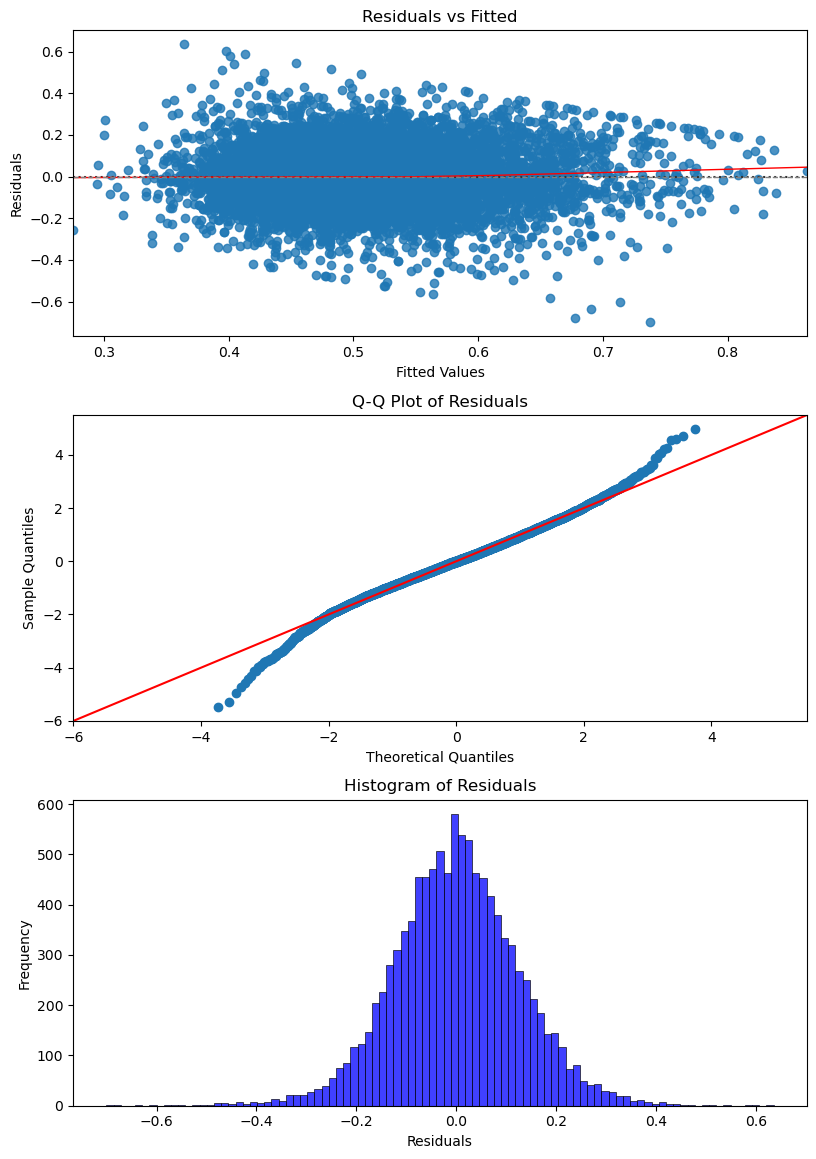

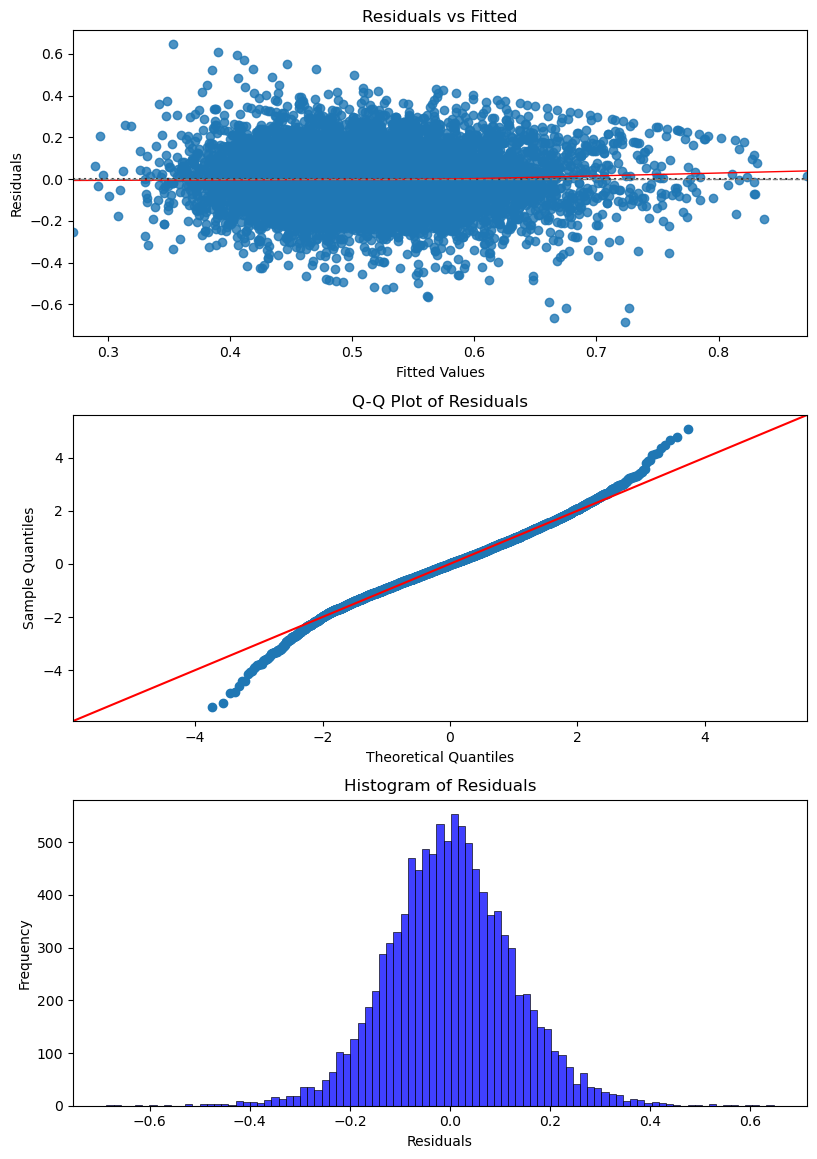

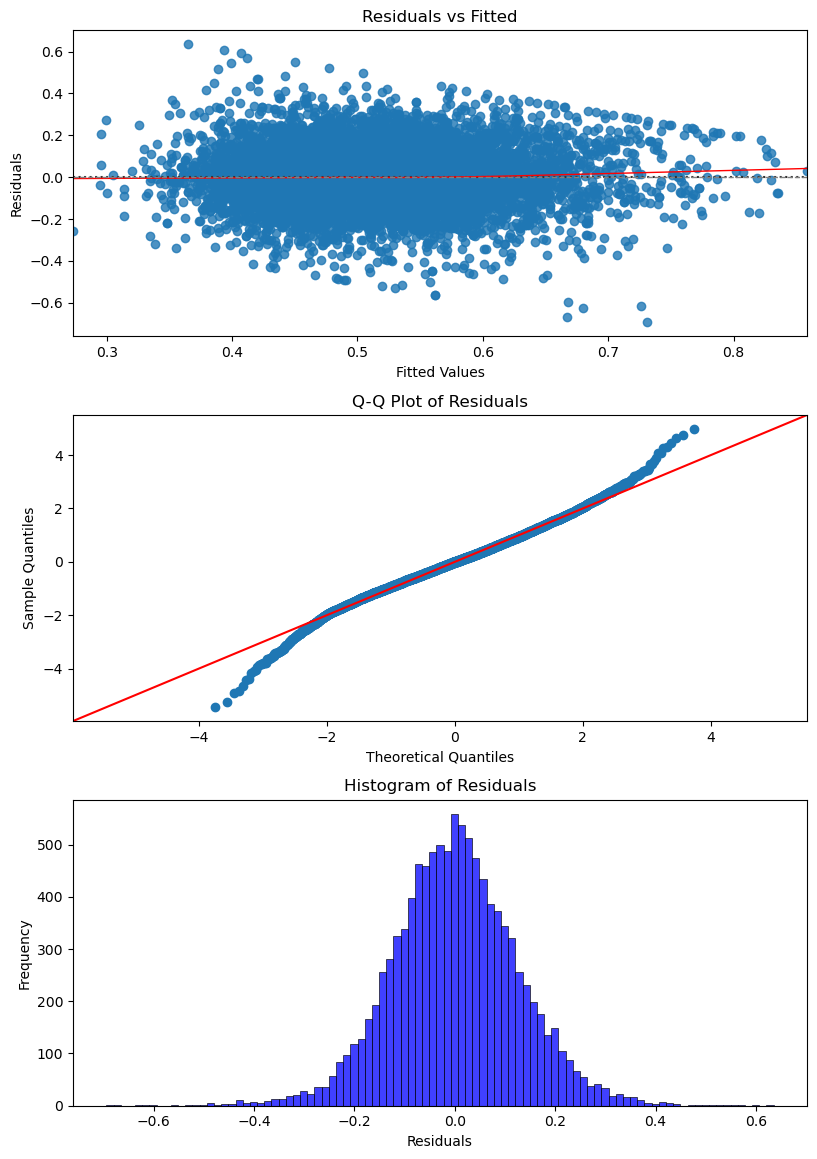

In [4]:
for i in range(len(regressions_exp)):
  X, y = df[regressions_exp[i]], df.national_distrust_index
  X = sm.add_constant(X)

  lm = sm.OLS(y, X).fit(cov_type="HC0")
  
  print(f"Regression run {i+1}------------------------\n")
  print(f"\caption\u007b Regressionresult  {i+1}, Adjusted $R^2$: {round(lm.rsquared_adj,3)}\u007d")
  apa_latex_est_tablular(lm, X)
  plot(lm, f"regression{i+1}_diag")